We'll design a Feedforward Neural Network (FNN) with Multiple Layers Perceptron (MLP) 

#### Loading Dataset

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [2]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_diabetes_one_hot_encoding.csv')

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Initial Model Architecture

In [3]:
# Define the model architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [5]:
# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], batch_size=64)

Epoch 1/100
893/893 [==============================] - 6s 3ms/step - loss: 0.1494 - accuracy: 0.9482 - auc: 0.9200 - val_loss: 0.1038 - val_accuracy: 0.9658 - val_auc: 0.9612
Epoch 2/100
 44/893 [>.............................] - ETA: 2s - loss: 0.1172 - accuracy: 0.9574 - auc: 0.9518

/N/soft/sles15/deeplearning/Python-3.11.5/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


893/893 [==============================] - 3s 3ms/step - loss: 0.1158 - accuracy: 0.9616 - auc: 0.9493 - val_loss: 0.0986 - val_accuracy: 0.9681 - val_auc: 0.9606
Epoch 3/100
893/893 [==============================] - 3s 3ms/step - loss: 0.1073 - accuracy: 0.9656 - auc: 0.9534 - val_loss: 0.0960 - val_accuracy: 0.9681 - val_auc: 0.9623
Epoch 4/100
893/893 [==============================] - 3s 3ms/step - loss: 0.1015 - accuracy: 0.9676 - auc: 0.9566 - val_loss: 0.0896 - val_accuracy: 0.9718 - val_auc: 0.9653
Epoch 5/100
893/893 [==============================] - 3s 3ms/step - loss: 0.0955 - accuracy: 0.9703 - auc: 0.9603 - val_loss: 0.0844 - val_accuracy: 0.9742 - val_auc: 0.9685
Epoch 6/100
893/893 [==============================] - 3s 3ms/step - loss: 0.0909 - accuracy: 0.9711 - auc: 0.9642 - val_loss: 0.0808 - val_accuracy: 0.9751 - val_auc: 0.9707
Epoch 7/100
893/893 [==============================] - 3s 3ms/step - loss: 0.0906 - accuracy: 0.9719 - auc: 0.9657 - val_loss: 0.0790 - v

In [7]:
# Load the best model
model.load_weights('best_model.h5')

# Predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

558/558 [==============================] - 1s 871us/step
Accuracy: 0.9738346033168983
ROC AUC: 0.974542067736869
Confusion Matrix:
[[16505     0]
 [  467   876]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     16505
           1       1.00      0.65      0.79      1343

    accuracy                           0.97     17848
   macro avg       0.99      0.83      0.89     17848
weighted avg       0.97      0.97      0.97     17848



#### Addressing Class Imbalance

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

# Now, use X_sm and y_sm instead of X_scaled and y for train-test split.
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [9]:
# Re-train with early stopping and model checkpointing
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint], batch_size=64)

Epoch 1/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.2007 - accuracy: 0.8974 - auc: 0.9740 - val_loss: 0.1819 - val_accuracy: 0.9079 - val_auc: 0.9787
Epoch 2/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.1891 - accuracy: 0.9054 - auc: 0.9762 - val_loss: 0.1799 - val_accuracy: 0.9133 - val_auc: 0.9792
Epoch 3/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.1862 - accuracy: 0.9097 - auc: 0.9771 - val_loss: 0.1766 - val_accuracy: 0.9136 - val_auc: 0.9796
Epoch 4/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.1850 - accuracy: 0.9103 - auc: 0.9774 - val_loss: 0.1785 - val_accuracy: 0.9110 - val_auc: 0.9793
Epoch 5/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.1837 - accuracy: 0.9119 - auc: 0.9777 - val_loss: 0.1754 - val_accuracy: 0.9130 - val_auc: 0.9799
Epoch 6/100
1653/1653 [==============================] - 5s 3ms/step - loss: 0.1828 - accuracy: 0.9117 - auc: 0.977

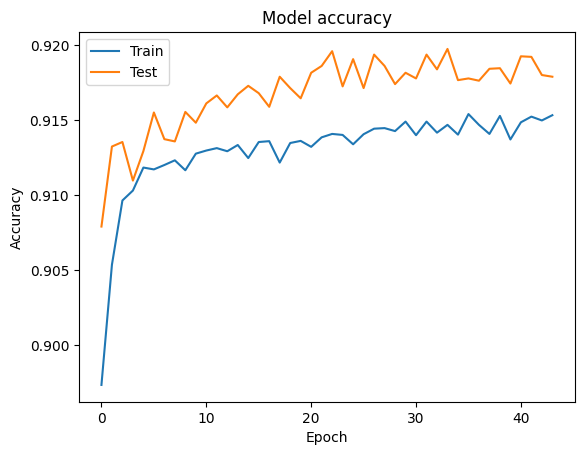

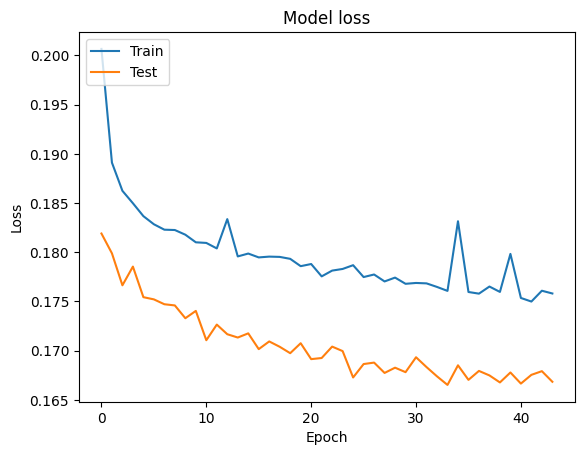

In [10]:
# Plot Training History
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=1)

print(f'Test Loss: {scores[0]}')
print(f'Test Accuracy: {scores[1]}')
print(f'Test AUC: {scores[2]}')

1033/1033 [==============================] - 2s 2ms/step - loss: 0.1688 - accuracy: 0.9178 - auc: 0.9811
Test Loss: 0.16879898309707642
Test Accuracy: 0.9178318381309509
Test AUC: 0.9811317920684814


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# New Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

1033/1033 [==============================] - 1s 858us/step
Accuracy: 0.9178318503722535
ROC AUC: 0.9811685421628225
Confusion Matrix:
[[14827  1571]
 [ 1144 15500]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     16398
           1       0.91      0.93      0.92     16644

    accuracy                           0.92     33042
   macro avg       0.92      0.92      0.92     33042
weighted avg       0.92      0.92      0.92     33042



#### Model Architecture with Refinements

In [13]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

###### Compile Model with Advanced Optimizer

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

##### Training with Updated Callbacks

In [15]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/100
1653/1653 [==============================] - 11s 5ms/step - loss: 0.3977 - accuracy: 0.8640 - auc: 0.9464 - val_loss: 0.2807 - val_accuracy: 0.8981 - val_auc: 0.9706 - lr: 0.0010
Epoch 2/100
1653/1653 [==============================] - 7s 5ms/step - loss: 0.2732 - accuracy: 0.8927 - auc: 0.9656 - val_loss: 0.2324 - val_accuracy: 0.9039 - val_auc: 0.9743 - lr: 0.0010
Epoch 3/100
1653/1653 [==============================] - 8s 5ms/step - loss: 0.2467 - accuracy: 0.8961 - auc: 0.9679 - val_loss: 0.2200 - val_accuracy: 0.9039 - val_auc: 0.9744 - lr: 0.0010
Epoch 4/100
1653/1653 [==============================] - 8s 5ms/step - loss: 0.2398 - accuracy: 0.8969 - auc: 0.9687 - val_loss: 0.2175 - val_accuracy: 0.9049 - val_auc: 0.9753 - lr: 0.0010
Epoch 5/100
1653/1653 [==============================] - 7s 4ms/step - loss: 0.2364 - accuracy: 0.8981 - auc: 0.9691 - val_loss: 0.2107 - val_accuracy: 0.9056 - val_auc: 0.9756 - lr: 0.0010
Epoch 6/100
1653/1653 [==========================

##### Evaluation on Test Data with Enhanced Metrics

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Make predictions
y_pred_proba = model.predict(X_test).ravel()
y_pred = np.where(y_pred_proba > 0.5, 1, 0)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

1033/1033 [==============================] - 1s 929us/step
Accuracy: 0.9144724895587434
ROC AUC: 0.9798299672186445
Confusion Matrix:
[[14653  1745]
 [ 1081 15563]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     16398
           1       0.90      0.94      0.92     16644

    accuracy                           0.91     33042
   macro avg       0.92      0.91      0.91     33042
weighted avg       0.92      0.91      0.91     33042



##### Advanced Model Performance Visualization

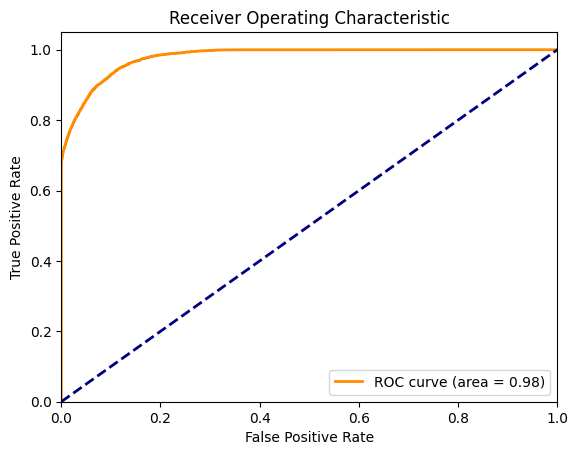

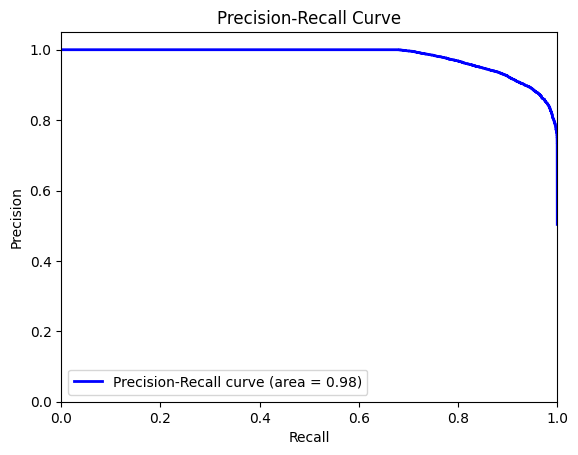

In [25]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [46]:
from tensorflow.keras.models import load_model

# Load the best model saved by ModelCheckpoint
best_model = load_model('best_model.h5')

# Specify the new path and filename
new_model_path = '../backend/DjangoDiabetesBackend/model/MLP_Initial_Balanced.h5'

# Save the model to the new path
best_model.save(new_model_path)

/N/soft/sles15/deeplearning/Python-3.11.5/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
